In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Advertising.csv', index_col = 0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 4)

##### Add some EDA steps like scatterplot, pairplot, distplot, heatmap, outlier plot etc

### Shuffle and Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# since it is a linear regression which is a relationship between a single input variable and target variable hence I will select any one input variable
features = data[['TV']]
target = data[['sales']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = .85)

print('Train set of features: ', X_train.shape)
print('Test set of features: ', X_test.shape)
print('Target for train: ', y_train.shape)
print('Target for test: ', y_test.shape)

Train set of features:  (170, 1)
Test set of features:  (30, 1)
Target for train:  (170, 1)
Target for test:  (30, 1)


### Learn the model on train data

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
my_model = LinearRegression()

In [10]:
# It gives me the function f in Y = f(X). The f here is my_model
my_model.fit(X_train, y_train)

LinearRegression()

#### Interpretation of model

In [11]:
#values of m and c learned in the gradient descent manner by the model
my_model.coef_, my_model.intercept_

(array([[0.04942539]]), array([6.91535001]))

Interpreting the coefficients

1. A unit increase in TV ad spending was associated with a .045 unit increase in Sales

OR 

An additional 1000 $ spent on TV was associated with an increase in sales of 45.523 units 

#### Prediction on new data

Suppose I want to know what value of sales will be associated if I spend 50,000$ in TV??

In [12]:
my_model.coef_ * 50  + my_model.intercept_

array([[9.38661975]])

In [13]:
my_model.predict([['50']])

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


array([[9.38661975]])

#### Plotting Best Fit line

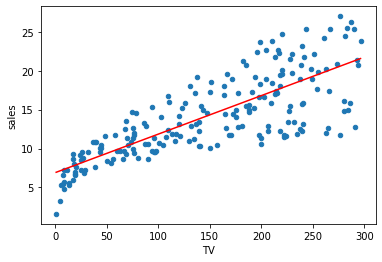

In [14]:
X_new = pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})
preds = my_model.predict(X_new)

data.plot(kind='scatter', x='TV', y='sales')
plt.plot(X_new,preds,c='red');

In [22]:
import statsmodels.formula.api as smf

In [ ]:
my_stat_models_model = smf.ols

### Test the model

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [16]:
y_pred = my_model.predict(X_test)

In [17]:
# MAE

mean_absolute_error(y_pred, y_test)

2.304820491866939

In [18]:
# Compare with the true values, MSE

mean_squared_error(y_pred, y_test)

10.366543793762606

In [19]:
#RMSE
np.sqrt(mean_squared_error(y_pred, y_test))

3.2197117563164883

### Predicting new values 

In [20]:
my_model.predict([[200, 100, 30]])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 3)